In [2]:
import numpy as np
import keras
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [3]:
# Set random state

np.random.seed(20)

In [4]:
cd ./input

[Errno 2] No such file or directory: './input'
/kaggle/working


In [5]:
# Load the data

train_raw = loadmat('../input/svhndataset/train_32x32.mat')
test_raw = loadmat('../input/svhndataset/test_32x32.mat')

In [391]:
# Load images and labels

train_images = np.array(train_raw['X'])
test_images = np.array(test_raw['X'])

train_labels = train_raw['y']
test_labels = test_raw['y']

In [7]:
# Check the shape of the data

print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)


In [8]:
# Fix the axes of the images

train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

print(train_images.shape)
print(test_images.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


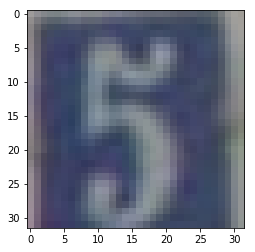

Label:  [5]


In [9]:
# Plot a random image and its label

plt.imshow(train_images[13529])
plt.show()

print('Label: ', train_labels[13529])

In [10]:
# Convert train and test images into 'float64' type
train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

In [11]:
# Convert train and test labels into 'int64' type
train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

In [12]:
# Normalize the images data

print('Min: {}, Max: {}'.format(train_images.min(), train_images.max()))

train_images /= 255.0
test_images /= 255.0

Min: 0.0, Max: 255.0


In [392]:
# One-hot encoding of train and test labels
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [50]:
# Split train data into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.15, random_state=22)

In [389]:
np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [15]:
# Data augmentation
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [24]:
# Define auxillary model

keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Dense(128,input_shape=(32,32,3),activation = 'relu'),
    keras.layers.Flatten(),    
    keras.layers.Dense(128, activation = 'relu'),    
    keras.layers.Dense(128, activation = 'relu'),
#     keras.layers.Dropout(0.4), 
    keras.layers.Dense(10, activation = 'softmax')                        
   ])

early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5', 
                   save_best_only=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32, 32, 128)       512       
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16777344  
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 16,795,658
Trainable params: 16,795,658
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Fit model in order to determine best learning rate
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=70, validation_data=(X_val, y_val),
                              callbacks=[early_stopping, model_checkpoint])



Epoch 1/70
487/487 [==============================] - 34s 69ms/step - loss: 2.0611 - accuracy: 0.2754 - val_loss: 1.4967 - val_accuracy: 0.5040
Epoch 2/70
487/487 [==============================] - 33s 68ms/step - loss: 1.4569 - accuracy: 0.5178 - val_loss: 1.1496 - val_accuracy: 0.6365
Epoch 3/70
487/487 [==============================] - 33s 67ms/step - loss: 1.2569 - accuracy: 0.5961 - val_loss: 1.0416 - val_accuracy: 0.6704
Epoch 4/70
487/487 [==============================] - 33s 68ms/step - loss: 1.1461 - accuracy: 0.6390 - val_loss: 0.9542 - val_accuracy: 0.7106
Epoch 5/70
487/487 [==============================] - 32s 66ms/step - loss: 1.0810 - accuracy: 0.6609 - val_loss: 0.9140 - val_accuracy: 0.7249
Epoch 6/70
487/487 [==============================] - 33s 68ms/step - loss: 1.0334 - accuracy: 0.6798 - val_loss: 0.8549 - val_accuracy: 0.7377
Epoch 7/70
487/487 [==============================] - 32s 65ms/step - loss: 0.9911 - accuracy: 0.6946 - val_loss: 0.8398 - val_accuracy:

487/487 [==============================] - 33s 68ms/step - loss: 0.6812 - accuracy: 0.7941 - val_loss: 0.6227 - val_accuracy: 0.8152
Epoch 58/70
487/487 [==============================] - 32s 65ms/step - loss: 0.6768 - accuracy: 0.7954 - val_loss: 0.6290 - val_accuracy: 0.8141
Epoch 59/70
487/487 [==============================] - 33s 67ms/step - loss: 0.6767 - accuracy: 0.7938 - val_loss: 0.6231 - val_accuracy: 0.8166
Epoch 60/70
487/487 [==============================] - 32s 65ms/step - loss: 0.6744 - accuracy: 0.7950 - val_loss: 0.6312 - val_accuracy: 0.8139
Epoch 61/70
487/487 [==============================] - 33s 67ms/step - loss: 0.6701 - accuracy: 0.7972 - val_loss: 0.6364 - val_accuracy: 0.8141
Epoch 62/70
487/487 [==============================] - 32s 65ms/step - loss: 0.6702 - accuracy: 0.7972 - val_loss: 0.6313 - val_accuracy: 0.8142
Epoch 63/70
487/487 [==============================] - 32s 67ms/step - loss: 0.6666 - accuracy: 0.7980 - val_loss: 0.6220 - val_accuracy: 0.81

In [27]:
model.save_weights('DAI_q4_a_Latest.h5')

In [28]:
# Evaluate train and validation accuracies and losses

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

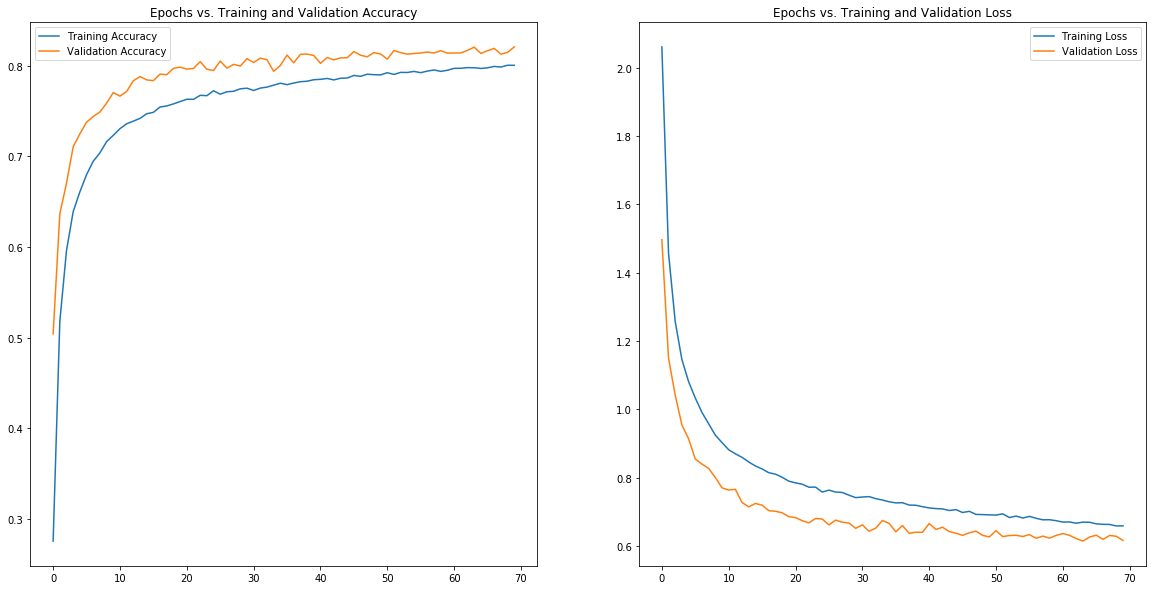

In [29]:
# Visualize epochs vs. train and validation accuracies and losses

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy'
         )
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [32]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=0)

print('Test accuracy is: {:0.4f}% \nTest loss is: {:0.4f}'.
      format(test_acc*100, test_loss))

Test accuracy is: 78.9874% 
Test loss is: 0.7612


In [305]:
# Get predictions and apply inverse transformation to the labels

y_pred = model.predict(X_train)

y_pred = lb.inverse_transform(y_pred, lb.classes_)
y_train = lb.inverse_transform(y_train, lb.classes_)

In [307]:
y_pred, y_train

(array([10,  9,  8, ...,  8,  1,  3]), array([10,  9,  8, ...,  8,  1,  3]))

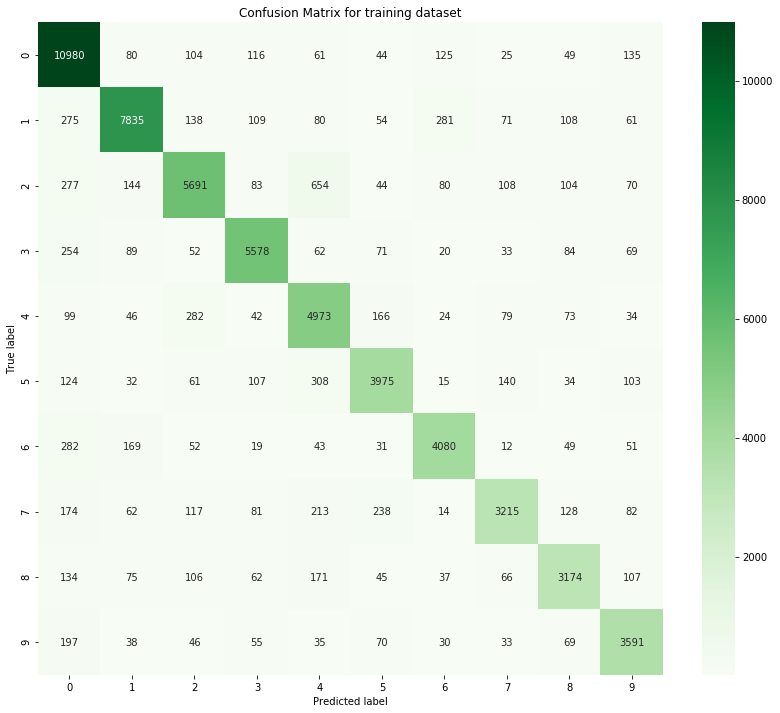

In [308]:
# Plot the confusion matrix

matrix = confusion_matrix(y_train, y_pred, labels=lb.classes_)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

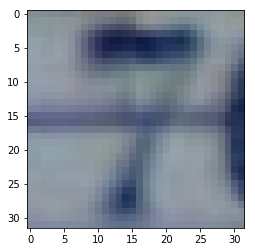

In [52]:
plt.imshow(X_val[3])

In [35]:
from sklearn.metrics import classification_report ,confusion_matrix
print(classification_report(y_train,y_pred,target_names=[ '1', '2',  '3',  '4',  '5',  '6',  '7',  '8',  '9', '10']))

              precision    recall  f1-score   support

           1       0.86      0.94      0.90     11719
           2       0.91      0.87      0.89      9012
           3       0.86      0.78      0.82      7255
           4       0.89      0.88      0.89      6312
           5       0.75      0.85      0.80      5818
           6       0.84      0.81      0.82      4899
           7       0.87      0.85      0.86      4788
           8       0.85      0.74      0.79      4324
           9       0.82      0.80      0.81      3977
          10       0.83      0.86      0.85      4164

    accuracy                           0.85     62268
   macro avg       0.85      0.84      0.84     62268
weighted avg       0.85      0.85      0.85     62268



# MNIST

In [395]:
import pandas as pd

df_test = pd.read_csv('../input/mnist-in-csv/mnist_test.csv')
df_test.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [368]:
an = np.array(df_test)
data = an[:,1:]
idx = (28*28,1*28,2*28,3*28,4*28,5*28,6*28,7*28,8*28,9*28,10*28,11*28,12*28,13*28,14*28,15*28,16*28,17*28,18*28,19*28,20*28,21*28,22*28,23*28,24*28,25*28,26*28,27*28,
      28*28,1*28,2*28,3*28,4*28,5*28,6*28,7*28,8*28,9*28,10*28,11*28,12*28,13*28,14*28,15*28,16*28,17*28,18*28,19*28,20*28,21*28,22*28,23*28,24*28,25*28,26*28,27*28,
      28*28,1*28,2*28,3*28,4*28,5*28,6*28,7*28,8*28,9*28,10*28,11*28,12*28,13*28,14*28,15*28,16*28,17*28,18*28,19*28,20*28,21*28,22*28,23*28,24*28,25*28,26*28,27*28,
      28*28,1*28,2*28,3*28,4*28,5*28,6*28,7*28,8*28,9*28,10*28,11*28,12*28,13*28,14*28,15*28,16*28,17*28,18*28,19*28,20*28,21*28,22*28,23*28,24*28,25*28,26*28,27*28)
p = np.insert(data, idx, 0, axis=1)
f = np.concatenate((p,np.zeros((10000,4*32))),axis =1)
rgb_data = np.dstack((f,np.zeros((f.shape)),np.zeros((f.shape)))) 
rgb_data = rgb_data.reshape((10000,32,32,3))
y_test_mnist = an[:,0]

In [287]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32, 32, 128)       512       
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16777344  
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 16,795,658
Trainable params: 16,795,658
Non-trainable params: 0
_________________________________________________________________


In [396]:
classes = np.array([ 0, 1,  2,  3,  4,  5,  6,  7,  8,  9])

In [407]:
mnist_pred = model.predict(rgb_data)
y_pred_mnist= []
for i in mnist_pred:
    y_pred_mnist.append(np.argmax(i))

np.unique(y_pred_mnist)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [409]:
np.unique(y_pred_mnist), np.unique(y_pred_mnist)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

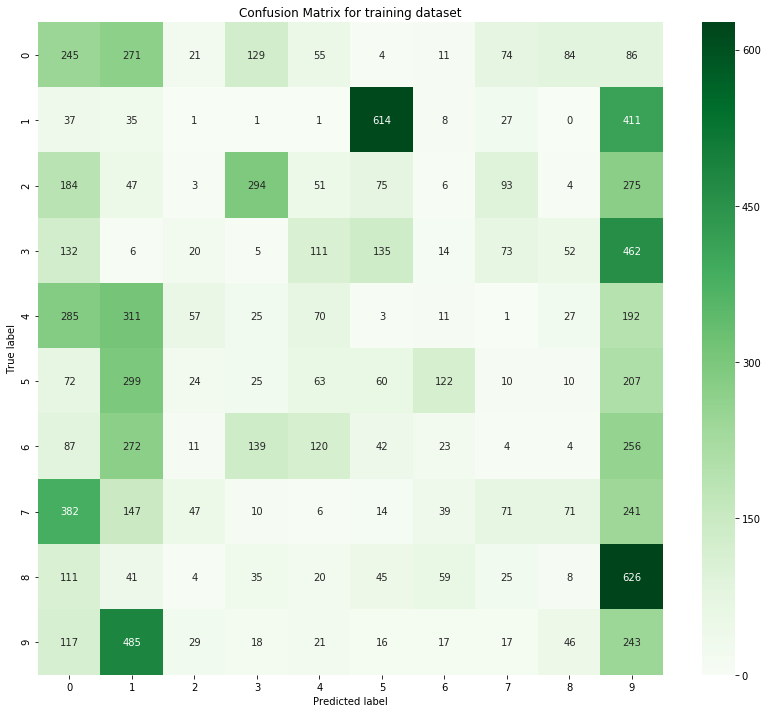

In [410]:
matrix = confusion_matrix(y_test_mnist, y_pred_mnist, labels=classes)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [411]:
from sklearn.metrics import classification_report ,confusion_matrix
print(classification_report(y_test_mnist,y_pred_mnist,classes))

              precision    recall  f1-score   support

           0       0.15      0.25      0.19       980
           1       0.02      0.03      0.02      1135
           2       0.01      0.00      0.00      1032
           3       0.01      0.00      0.01      1010
           4       0.14      0.07      0.09       982
           5       0.06      0.07      0.06       892
           6       0.07      0.02      0.04       958
           7       0.18      0.07      0.10      1028
           8       0.03      0.01      0.01       974
           9       0.08      0.24      0.12      1009

    accuracy                           0.08     10000
   macro avg       0.07      0.08      0.06     10000
weighted avg       0.07      0.08      0.06     10000

